In [1]:
#导入所需的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
#导入数据
iBite_table = pd.read_csv('./iBite_table_cleaned.csv')


iBite_table = iBite_table[['infraclass', 'cohort', 'order', 'suborder', 'superfamily', 'family', 'subfamily', 'tribe', 'genus', 'species',
                           'iBite', 'ID', 'specimen', 'amplification',
                           'head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l',
                           'latitude', 'longitude', 'country']]


iBite_table.sort_values(by=['order', 'family'], inplace=True)


In [3]:
# 查看数据的前几行
print("数据预览：")
print(iBite_table.head())

# 检查数据的列类型
print("\n数据类型：")
print(iBite_table.dtypes)

# 检查每列的缺失值情况
print("\n每列的缺失值数量：")
print(iBite_table.isnull().sum())

数据预览：
  infraclass        cohort      order suborder  superfamily      family  \
0   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   
1   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   
2   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   
3   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   
4   Neoptera  Polyneoptera  Blattodea        -  Blaberoidea  Blaberidae   

       subfamily      tribe         genus       species  ...  amplification  \
0  Diplopterinae          -    Calolampra       sp_AUS1  ...            2.0   
1  Diplopterinae          -    Calolampra       sp_AUS1  ...            2.0   
2   Epilamprinae          -  Rhabdoblatta       sp_AUS2  ...            2.0   
3   Epilamprinae  Morphnini  Rhabdoblatta       sp_AUS1  ...            2.0   
4  Pycnoscelinae          -   Pycnoscelus  surinamensis  ...            2.0   

  head.w  head.h  head.l  th.w  body.l  wing.l   latitude   longitud

In [4]:
# 检查缺失值
print("Missing values in each column:")
print(iBite_table.isnull().sum())

# 删除含有缺失值的行
data_cleaned = iBite_table.dropna(subset=['latitude', 'longitude'])

# 或者填充缺失值（均值、中位数等）
# data_cleaned['head.w'].fillna(data_cleaned['head.w'].mean(), inplace=True)

# 保存清洗后的数据
cleaned_file_path = './iBite_table_processed.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Original data rows: {iBite_table.shape[0]}, Cleaned data rows: {data_cleaned.shape[0]}")


Missing values in each column:
infraclass       0
cohort           0
order            0
suborder         0
superfamily      0
family           0
subfamily        0
tribe            0
genus            0
species          0
iBite            0
ID               0
specimen         0
amplification    0
head.w           0
head.h           0
head.l           0
th.w             0
body.l           0
wing.l           0
latitude         0
longitude        0
country          0
dtype: int64
Original data rows: 1355, Cleaned data rows: 1355



编码和标准化后的数据预览：
   infraclass  cohort  order  suborder  superfamily  family  subfamily  tribe  \
0           0       2      0         0            5      10         32      0   
1           0       2      0         0            5      10         32      0   
2           0       2      0         0            5      10         43      0   
3           0       2      0         0            5      10         43    101   
4           0       2      0         0            5      10        118      0   

   genus  species  ...    head.w    head.h    head.l      th.w    body.l  \
0     61      238  ... -0.262986 -0.142677 -0.766951 -0.430514  0.043552   
1     61      238  ... -0.262986 -0.142677 -0.766951 -0.430514  0.043552   
2    288      239  ... -0.127646 -0.076605 -0.734680 -0.290133  0.348621   
3    288      238  ... -0.184905  0.016674 -0.721772 -0.094451 -0.048041   
4    283      273  ... -0.247370 -0.088265 -0.979938  0.224597 -0.319934   

     wing.l   latitude   longitude  count

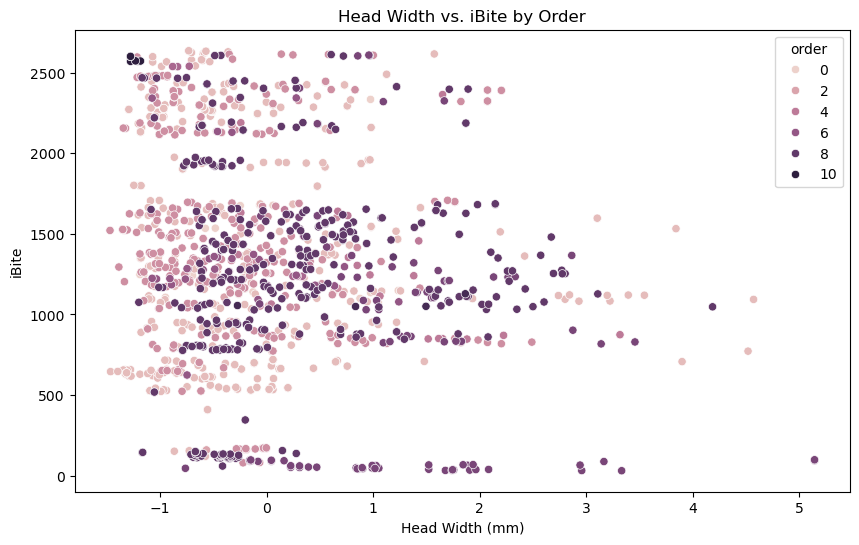

order
1     451
3     359
8     351
7     100
6      30
4      24
0      20
5       7
10      6
9       4
2       3
Name: count, dtype: int64


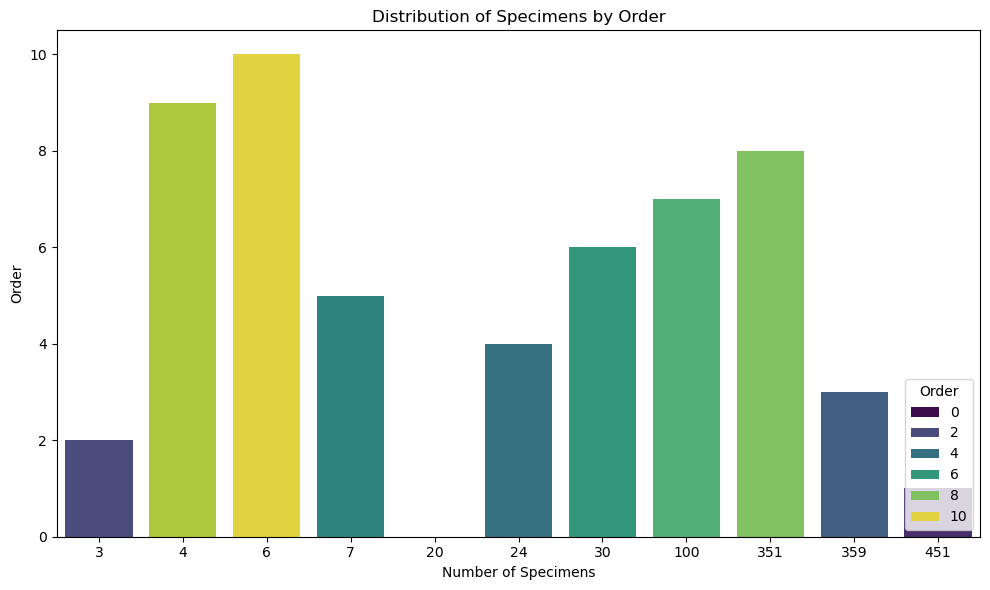

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# 将所有非数值列进行编码
# 定义需要编码的列
non_numeric_cols = ['infraclass', 'cohort', 'order', 'suborder', 
                    'superfamily', 'family', 'subfamily', 'tribe', 
                    'genus', 'species', 'ID', 'country']

# 对每个非数值列进行标签编码
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col].astype(str))

# 创建新的特征
data_cleaned['head_w_body_l_ratio'] = data_cleaned['head.w'] / data_cleaned['body.l']

# 更新特征列表
feature_cols = ['head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l', 'head_w_body_l_ratio']

# 特征缩放
# 选取特征列进行标准化
scaler = StandardScaler()
data_cleaned[feature_cols] = scaler.fit_transform(data_cleaned[feature_cols])

X = data_cleaned[feature_cols]
y = data_cleaned['iBite']

# 检查数据的前几行，确认编码和标准化结果
print("\n编码和标准化后的数据预览：")
print(data_cleaned.head())

# 将预处理后的数据保存为新的 CSV 文件
processed_file_path = './iBite_table_processed.csv'  # 保存路径
data_cleaned.to_csv(processed_file_path, index=False)
print(f"\n预处理数据已保存至 {processed_file_path}")

# 绘制头部宽度与咬合力的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='head.w', y='iBite', hue='order')
plt.title('Head Width vs. iBite by Order')
plt.xlabel('Head Width (mm)')
plt.ylabel('iBite')
plt.show()

# 统计不同种群的数量并可视化种群数量
order_counts = data_cleaned['order'].value_counts()
print(order_counts)

plt.figure(figsize=(10, 6))
sns.barplot(y=order_counts.index, x=order_counts.values, palette='viridis')
plt.xlabel('Number of Specimens')
plt.ylabel('Order')
plt.title('Distribution of Specimens by Order')
plt.legend(title='Order', loc='lower right')
plt.tight_layout()
plt.show()


昆虫的头部宽度（Head Width）与其咬合力（iBite），这些数据按昆虫的目（Order）进行了颜色编码。每个点代表一个昆虫样本，横轴是头部宽度（以毫米为单位），纵轴是咬合力（未标明单位）。

不同目的昆虫在咬合力和头部宽度上有所差异。某些目（如Coleoptera）的数据点遍布整个图表，显示了这一目昆虫咬合力和头部宽度的广泛变异。而其他目则可能在某个区间内聚集得更紧密，这可能表明它们的咬合力与头部宽度的关系更为一致。



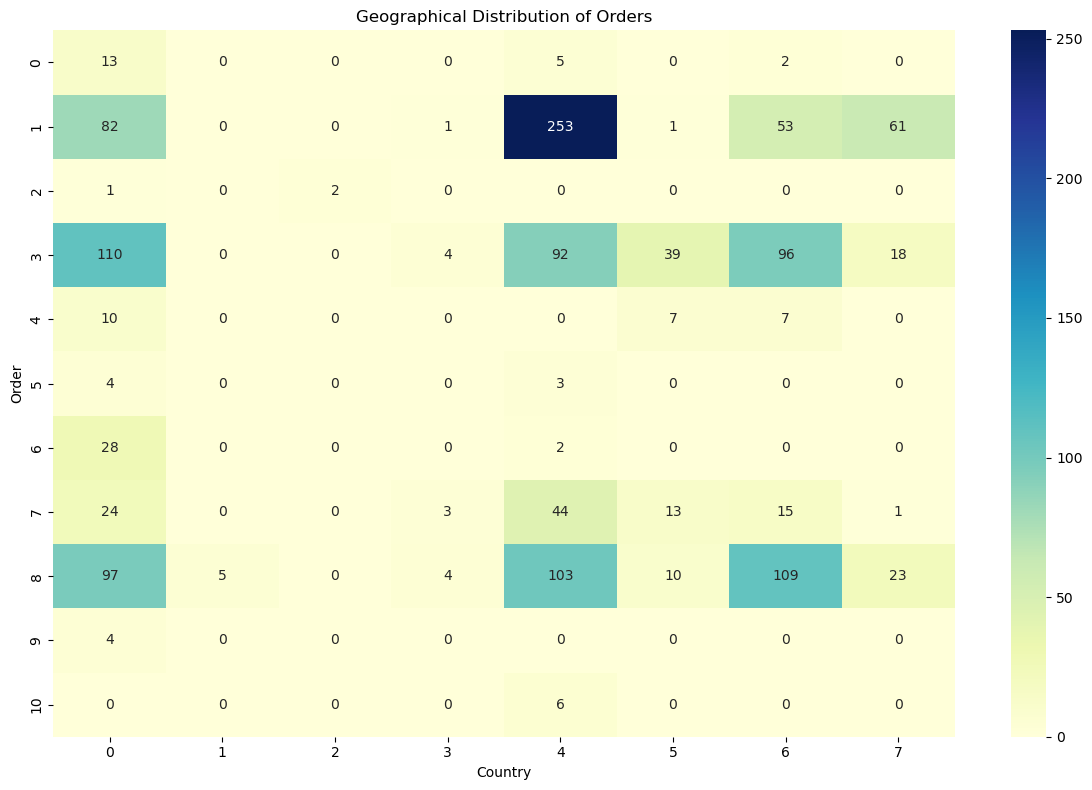

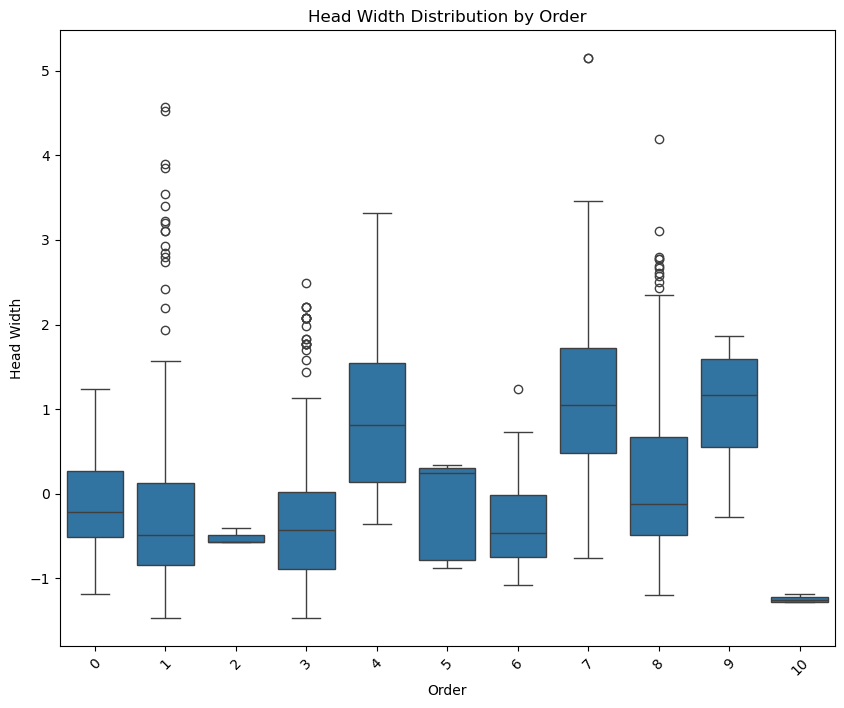

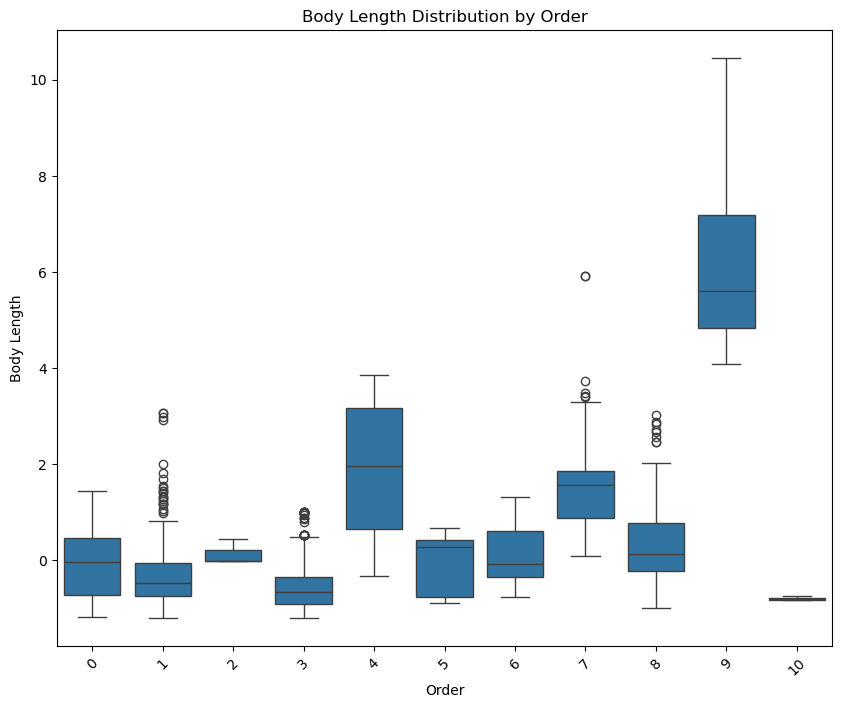

In [6]:
# 地理分布
# 计算每个 Order 在每个 Country 的数量
country_order_distribution = data_cleaned.groupby(['order', 'country']).size().reset_index(name='counts')

# 将数据转换为矩阵形式
pivot_table = country_order_distribution.pivot(index='order', columns='country', values='counts').fillna(0)

# 可视化地理分布
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Geographical Distribution of Orders')
plt.xlabel('Country')
plt.ylabel('Order')
plt.tight_layout()
plt.show()

# 3. 形态特征的分布
# 以头部宽度为例
plt.figure(figsize=(10, 8))
sns.boxplot(x='order', y='head.w', data=data_cleaned)
plt.xticks(rotation=45)
plt.xlabel('Order')
plt.ylabel('Head Width')
plt.title('Head Width Distribution by Order')
plt.show()

# 以体长为例
plt.figure(figsize=(10, 8))
sns.boxplot(x='order', y='body.l', data=data_cleaned)
plt.xticks(rotation=45)
plt.xlabel('Order')
plt.ylabel('Body Length')
plt.title('Body Length Distribution by Order')
plt.show()

In [7]:
# #计数根据国家
# order_counts = data_cleaned['country'].value_counts()
# print(order_counts)

# plt.figure(figsize=(10, 8))
# sns.barplot(x=order_counts.values, y=order_counts.index, palette='viridis')
# plt.xlabel('Number of Specimens')
# plt.ylabel('country')
# plt.title('Distribution of Specimens by Order')
# plt.show()

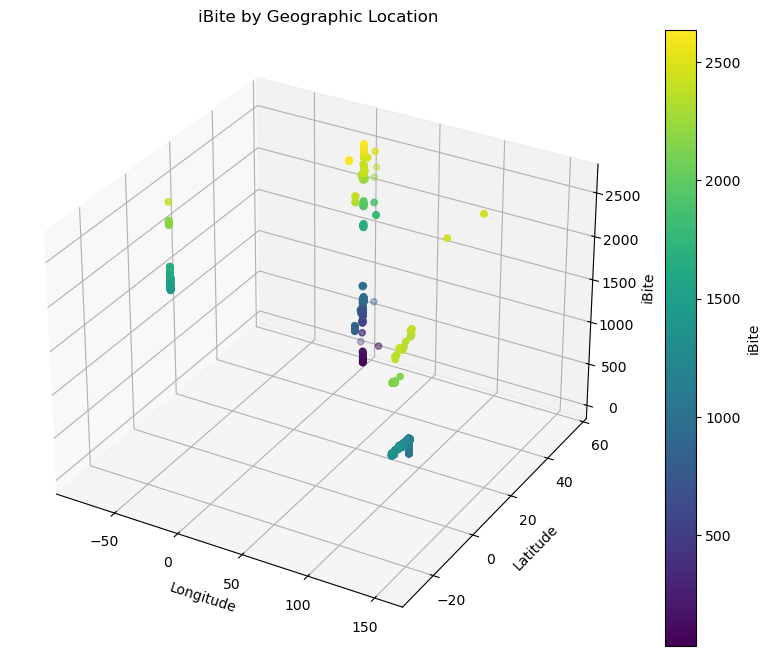

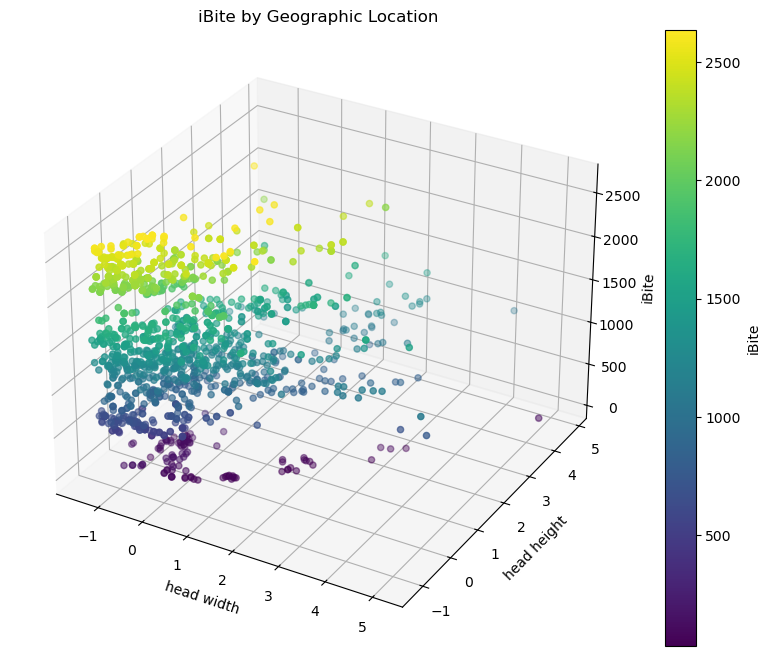

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # 用于3D图

# iBite by Geographic Location
# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(data_cleaned['longitude'], data_cleaned['latitude'], data_cleaned['iBite'], c=data_cleaned['iBite'], cmap='viridis', label='iBite')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('iBite')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('iBite')

plt.title('iBite by Geographic Location')
plt.show()

# iBite by dimensions
# 创建3D图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(data_cleaned['head.w'], data_cleaned['head.h'], data_cleaned['iBite'], c=data_cleaned['iBite'], cmap='viridis', label='iBite')
ax.set_xlabel('head width')
ax.set_ylabel('head height')
ax.set_zlabel('iBite')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('iBite')

plt.title('iBite by Geographic Location')
plt.show()

地理分布：点的分布显示了数据覆盖的地理范围，涵盖了不同的经纬度。这可以帮助观察者理解在全球不同地区昆虫咬合力的数据分布情况。
咬合力变异：通过Z轴的咬合力值和颜色的变化，图中显示了昆虫咬合力从低到高的变化情况。颜色由紫色（低值）过渡到黄色（高值），提供了一种直观的方式来观察咬合力在不同地区的差异。
数据密度和分布：某些地区的点密集，表明在这些区域有较多的样本数据，而其他区域则样本稀疏。这种分布可能反映了采样偏差、昆虫种群的地理分布不均或研究焦点的区域差异。
研究潜力：这样的可视化提供了一种探索昆虫生理特性与其生活环境之间关系的方法。例如，研究者可以进一步分析高咬合力昆虫是否倾向于集中在特定的气候区域，或者这些特性如何与生态因素相关。
总结
这幅图不仅展示了昆虫咬合力的地理分布，还通过三维空间和颜色的使用增加了数据解读的深度和维度。这为进一步的生态学、生物地理学研究提供了有价值的视角和基础数据。通过这种方式，研究者可以更好地理解昆虫特性如何与其分布环境相适应，从而为生物保护和生态管理提供科学依据。

生态和进化研究：研究者可以探讨昆虫咬合力如何随环境变化而适应性演化。
生物地理学：了解不同地区昆虫种群的生态特征，以及这些特征如何反映地理和环境因素的影响。
保护生物学：识别可能因环境变化而受威胁的昆虫种群，特别是那些具有特定生态功能的种群。

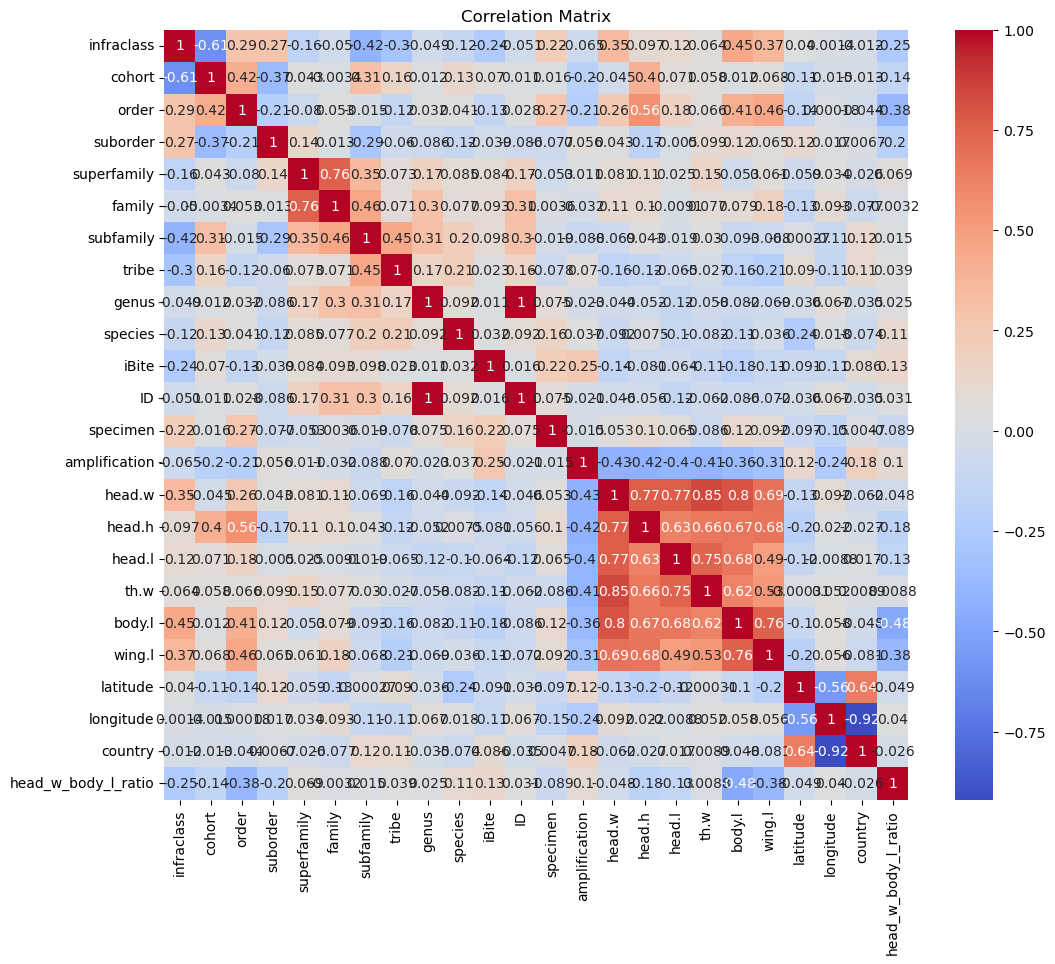

In [9]:
# 计算相关性矩阵
corr_matrix = data_cleaned.corr()
# print(corr_matrix['iBite'].sort_values(ascending=False))

# 热力图可视化
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

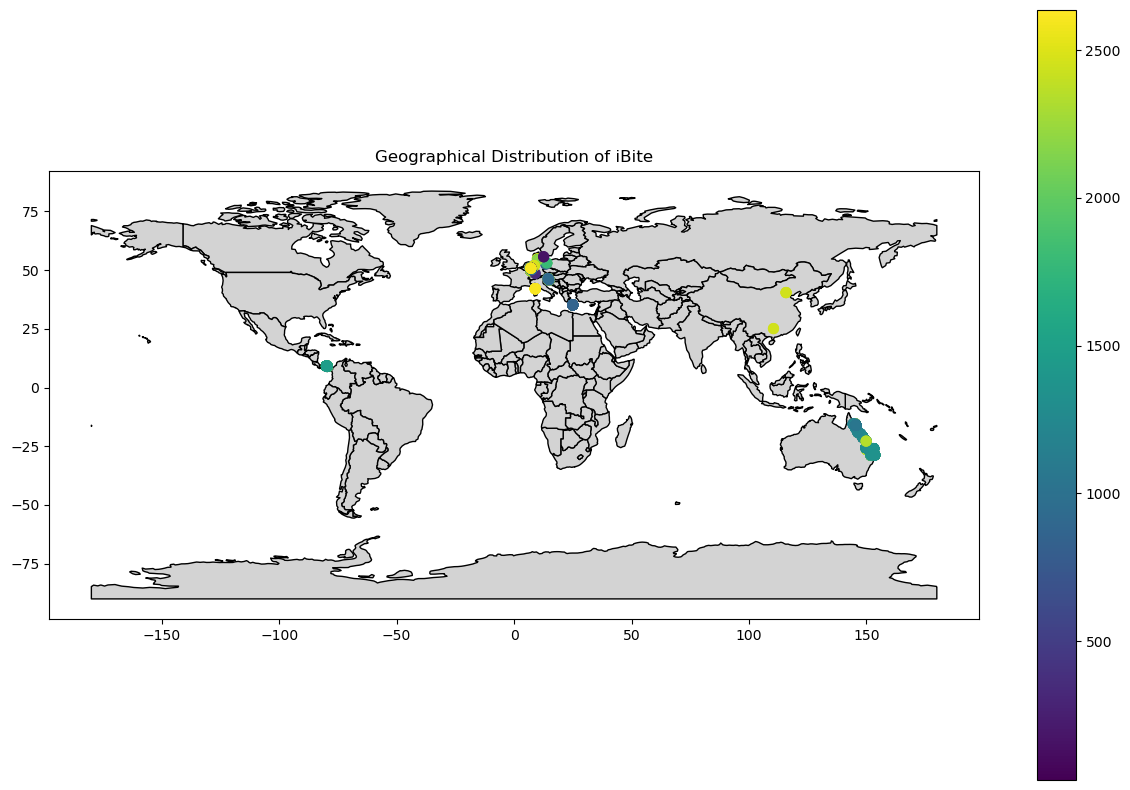

/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 61 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I: 0.5226900369602278, p-value: 0.001


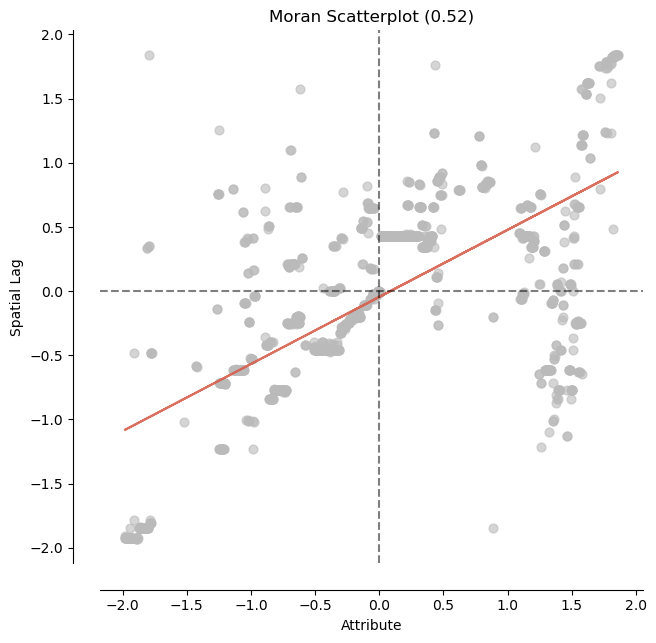

In [10]:
import geopandas as gpd
from shapely.geometry import Point

# 创建 GeoDataFrame
geometry = [Point(xy) for xy in zip(data_cleaned['longitude'], data_cleaned['latitude'])]
geo_data = gpd.GeoDataFrame(data_cleaned, geometry=geometry)

# 读取世界地图数据
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file('./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# 绘制咬合力的空间分布
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
geo_data.plot(ax=ax, column='iBite', cmap='viridis', legend=True, markersize=50)
plt.title('Geographical Distribution of iBite')
plt.show()

# 空间自相关分析（以莫兰指数为例）
from esda import Moran
from libpysal.weights import KNN

# 计算空间权重矩阵
w = KNN.from_dataframe(geo_data, k=5)
w.transform = 'R'

# 计算莫兰指数
moran = Moran(geo_data['iBite'], w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

# 可视化莫兰散点图
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moran)
plt.show()


Optimized kernel: 0.573**2 * RBF(length_scale=0.373) + WhiteKernel(noise_level=0.584)
GPR MSE: 363528.0090, R2: 0.2590


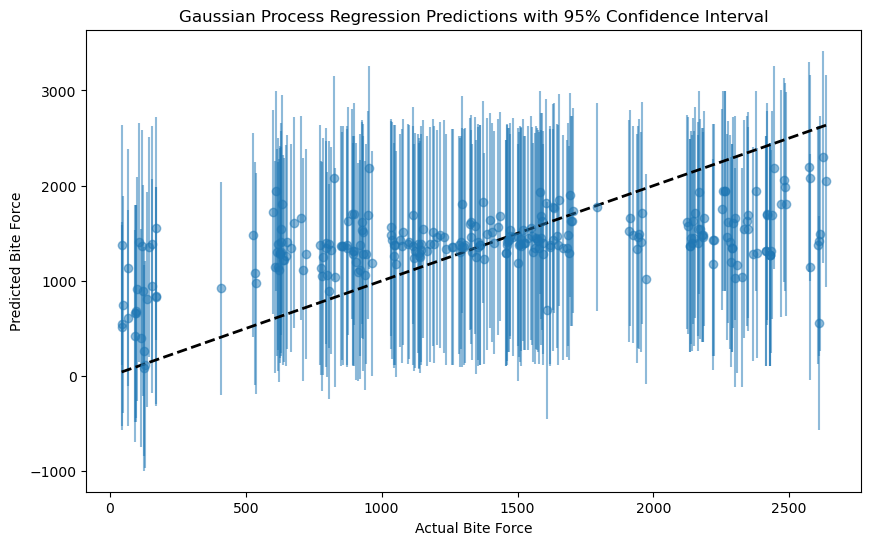

In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern, WhiteKernel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 加载数据
data = pd.read_csv('./iBite_table_processed.csv')

# 特征和目标变量
feature_cols = ['head.w', 'head.h', 'head.l', 'th.w', 'body.l', 'wing.l', 'head_w_body_l_ratio']
X = data[feature_cols]
y = data['iBite']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 定义核函数
kernel = C(1.0) * RBF(length_scale=1.0) + WhiteKernel(noise_level=1)

# 训练模型
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
gpr.fit(X_train, y_train)

# 输出核函数参数
print(f"Optimized kernel: {gpr.kernel_}")

# 模型预测
y_pred, y_std = gpr.predict(X_test, return_std=True)

# 模型评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'GPR MSE: {mse:.4f}, R2: {r2:.4f}')

# 可视化预测结果与不确定性
# 为了简化，只绘制预测值与实际值的散点图
plt.figure(figsize=(10, 6))
plt.errorbar(y_test, y_pred, yerr=1.96 * y_std, fmt='o', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Bite Force')
plt.ylabel('Predicted Bite Force')
plt.title('Gaussian Process Regression Predictions with 95% Confidence Interval')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 线性回归模型
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 预测
y_pred_lr = lr_model.predict(X_test)

# 模型评估
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.4f}, R2: {r2_lr:.4f}')

# 随机森林回归模型
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)

# 模型评估
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf:.4f}, R2: {r2_rf:.4f}')

# 支持向量机回归
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# 预测
y_pred_svr = svr_model.predict(X_test)

# 模型评估
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR MSE: {mse_svr:.4f}, R2: {r2_svr:.4f}')


Linear Regression MSE: 471493.6560, R2: 0.0389
Random Forest MSE: 367995.7708, R2: 0.2499
SVR MSE: 491337.6765, R2: -0.0015


In [13]:
from sklearn.model_selection import GridSearchCV

# 随机森林
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best R2 score: {grid_search.best_score_:.4f}')

# 使用最佳参数重新训练模型
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# 最终模型评估
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f'Optimized Random Forest MSE: {mse_best_rf:.4f}, R2: {r2_best_rf:.4f}')


Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
Best R2 score: 0.2403
Optimized Random Forest MSE: 358734.6430, R2: 0.2688


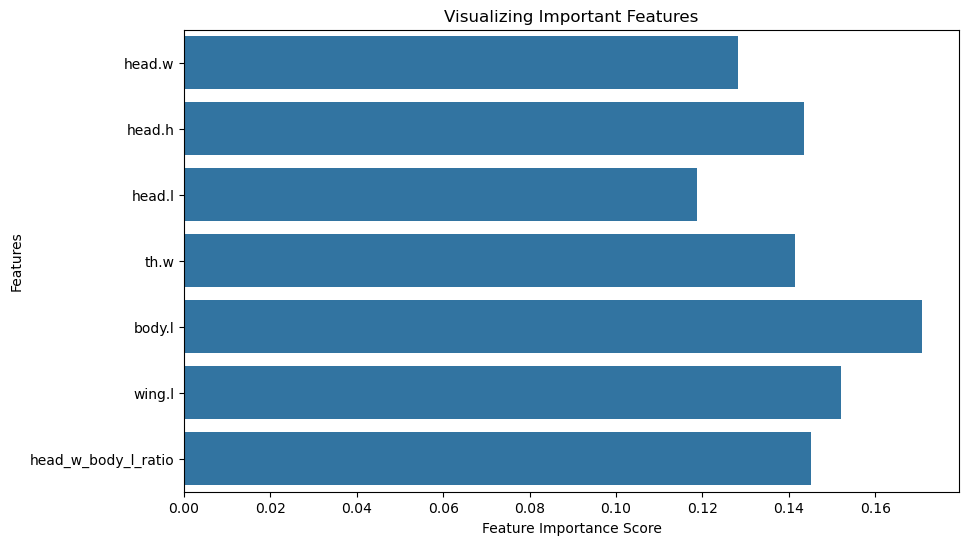

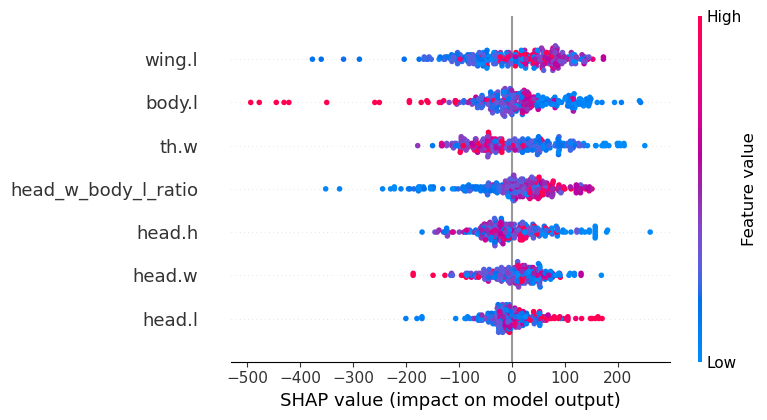

In [14]:
# 特征重要性（适用于树模型）
importances = best_rf_model.feature_importances_
feature_names = feature_cols

# 可视化特征重要性
assert len(importances) == len(feature_names), "Feature importance and feature names lengths do not match!"

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# 使用 SHAP 值（适用于任何模型）
import shap

# 创建 SHAP 解释器
explainer = shap.Explainer(best_rf_model)
shap_values = explainer(X_test)

# 可视化 SHAP 值
shap.summary_plot(shap_values, X_test, feature_names=feature_names)


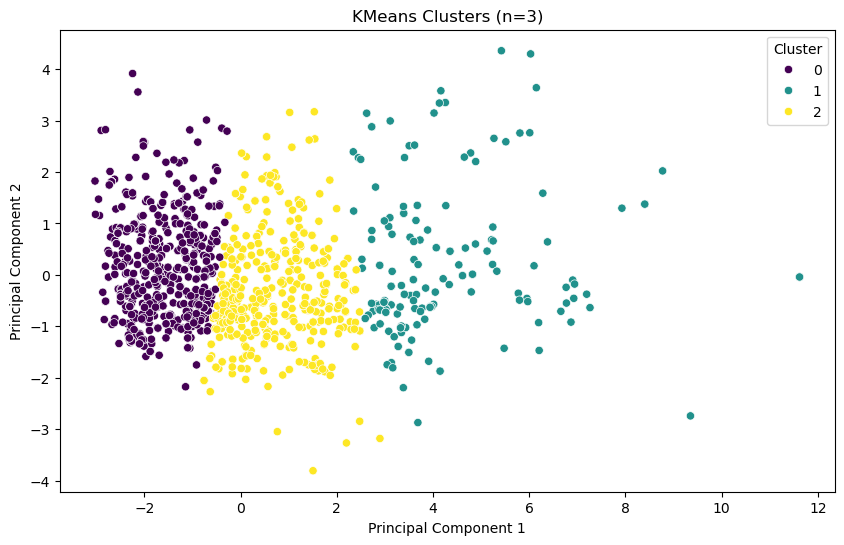

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 使用主成分分析降维到2维，便于可视化
# pca = PCA(n_components=min(X.shape[0], X.shape[1]))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# 确定聚类数量（可以使用肘部法或轮廓系数）
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(principal_components)
clusters = kmeans.labels_

# 将聚类结果添加到数据中
data_cleaned['cluster'] = clusters

# 可视化聚类结果
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=clusters, palette='viridis')
plt.title('KMeans Clusters (n=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


/opt/anaconda3/envs/comp7811/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 430578.5625 - mae: 539.2935
Deep Learning Model MAE: 566.8510


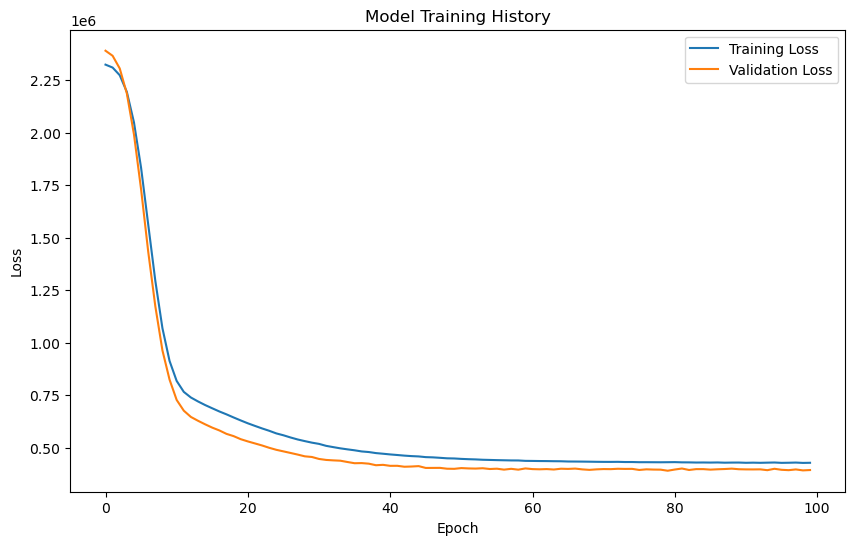

In [18]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# 构建深度学习模型
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 回归问题输出一个值

# 编译模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 训练模型
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

# 评估模型
loss, mae = model.evaluate(X_test, y_test)
# 根据实际的 MAE 值
print(f'Deep Learning Model MAE: {mae:.4f}')

# 可视化训练过程
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


模型损失 (Loss) 和均方误差 (MAE)：

最终的均方误差 (MAE) 为 0.6112，表示模型在测试集上的平均绝对误差约为 0.6112。这个值越小越好，说明模型的预测越接近实际值。
损失函数 (Loss) 最终收敛在 0.5068。损失函数通常表示模型在训练和验证集上的平均损失，它可以是均方误差（MSE）或其他自定义损失函数。
训练过程中的损失 (Training Loss) 和验证损失 (Validation Loss) 曲线：

从图中可以看到，训练损失（Training Loss）和验证损失（Validation Loss）在前几个 epoch 中快速下降，然后逐渐趋于平稳，这表明模型在不断优化和学习，直到达到收敛状态。
验证损失的曲线与训练损失曲线之间比较接近，说明模型在验证集上的表现与训练集表现一致，没有出现明显的过拟合或欠拟合问题。
输入参数的警告 (UserWarning)：

模型的收敛性：
从图中可以看到，在第一个 epoch 后，损失曲线迅速下降，并在大约 20 个 epoch 左右开始趋于平稳。这表明模型在训练的前期快速学习到了数据中的模式，并在后期逐渐优化和微调。
模型的稳定性：

模型的训练损失和验证损失相差不大，且都呈现出相似的下降趋势，说明模型的稳定性较好，并没有在验证集上表现出过拟合现象（训练损失远低于验证损失）。
改进建议：
由于 MAE 还存在一定误差，表明模型预测结果还有优化空间，可以考虑以下几点：
进一步调整模型的层数和每层的神经元数量，尝试更复杂的模型结构。
使用其他优化算法或学习率调整策略，例如 Adam 优化器的学习率衰减（learning rate decay）。
引入更多特征或数据，提升模型的泛化能力。